# ECOM90025 ADA: Tutorial 7 in Week 8

- Covering materials from week 7 lecture (more on) Treatment Effect: DiD, RDD and IV.

# My contact:
- Name: Zheng Fan
- Email: fan.z@unimelb.edu.au
- Send me an email if you have any general or conceptual questions
- I'm also happy to stay for a while after the tutorial.
- Consultataion: meet Dr Yong Song every Tuesday 1-2pm at FBE level-3 360.
- Special consideration: visit Stop 1.

# Tutorial participation 
- You need to actively participate instead of just showing up. 
- Attendance does not guarantee marks. 
- You may get a maximum of 10 points out of 11 tutorials.
- If you unable to come to school, seek help from Stop 1.

# Software:
- Google Colab is a free online platform where you can execute your code (especially for Python) and write text (LaTeX and Html) without any software installed.
- Local Jupyter Lab, which has been demonstrated during the lecture.
- Local Jupyter Notebook from Anaconda (My personal preference). Just download Anaconda, and then open Jupyter Notebook.
- Other IDE such as PyCharm, but I'm not very comfortable with using PyCharm. From what I know, the code saved in PyCharm is .py but not .ipynb, which may requires some conversion.

Although you can always use Colab, It is recommended to have a local machine installed.

#### You may access my tutorial code via: https://github.com/zhengf1/2023-S2-ADA or Canvas after Wednesday afternoon.
- <font color="red">
If you are using Google Colab, you can simply copy paste the code; or you can upload this ".ipynb" notebook file to Google Colab, which would look exactly the same as local Jupyter machine.
    </font>

# DiD: A short review

A famous paper by Card and Krueger (1994), investigates the following question: 
- Does raising the minimum wage reduce employment?


Regression: two “main” effects (time $d_{N o v}$ and state $N J_s$) and one interaction

$$ Y_{i s t}=\alpha+\gamma \cdot N J_s+\lambda \cdot d_{N o v}+\delta\left(N J_S \cdot d_{N o v}\right)+\varepsilon_{i s t} $$

where the treatment is $D_{s t}=N J_s \cdot d_{N o v}$.

<table>
  <tr>
    <th> </th>
    <th>$d_{N o v}=0$</th>
    <th>$d_{N o v}=1$</th>
    <th>Difference</th>
  </tr>
  <tr>
    <th> $N J_s=0$</th>
    <th>$\alpha$</th>
    <th>$\alpha+\lambda$</th>
    <th>$\lambda$</th>
  </tr>
     <tr>
    <th>$N J_s=1$ </th>
    <th>$\alpha+\gamma$</th>
    <th> $\alpha+\gamma+\lambda+\delta$ </th>
    <th> $\lambda + \delta$</th>
  </tr>  
     <tr>
    <th> Difference</th>
    <th>$\gamma$</th>
    <th>$\gamma+\delta$</th>
    <th>$\delta$</th>
  </tr>
</table>


<img src='did.jpg' width=500>

The main identifying assumption of DiD: 
 - common/parallel “trends” in outcomes in treated and control groups.

# Housekeeping code to start with

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Task 1: DiD: Effect of a Garbage Incinerator on Housing Price.

This question is Based on Kiel and McClain (1995). The data is from Wooldridge Example 13.3. The data [description](https://www.dropbox.com/s/mn2iu0gkix0pqii/KIELMC.DES?dl=0) and [raw data](https://www.dropbox.com/s/6nga0ds63zhujwq/KIELMC.raw?dl=0) are provided to you.
The variables and their meanings are listed below.

Obs:   321

1. year:                     1978 or 1981
2. age:                      age of house
3. agesq:                    age^2
4. nbh:                      neighborhood #, 1 to 6
5. cbd:                      dist. to central bus. dstrct, feet
6. intst:                    dist. to interstate, feet
7. lintst:                   log(intst)
8. price:                    selling price
9. rooms:                    # rooms in house
10. area:                     square footage of house
11. land:                     square footage lot
12. baths:                    # bathrooms
13. dist:                     dist. from house to incinerator, feet
14. ldist:                    log(dist)
15. wind:                     perc. time wind incin. to house
16. lprice:                   log(price)
17. y81:                      =1 if year == 1981
18. larea:                    log(area)
19. lland:                    log(land)
20. y81ldist:                 y81*ldist
21. lintstsq:                 lintst^2
22. nearinc:                  =1 if dist <= 15840
23. y81nrinc:                 y81*nearinc
24. rprice:                   price, 1978 dollars
25. lrprice:                  log(rprice)


1. Read the data and give proper names to each variable. Note: The raw data is not a CSV, so `read.csv` does not work. What can you do about it?
2. Use 1981 data to estimate a linear model of `rprice` on `nearinc`. Why not use `price`?
3. Use 1978 data to estimate the same model.
4. What is the treatment effect based on the previous two regression results?
5. Set up a DiD regression as in the lecture and find the treatment effect.

**Answer to question 2**: rprice is price measured in 1978 dollars, which is inflation adjusted so that the 1981 and 1978 prices are comparable.

In [2]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/6grt5efg3v9ihopu4vky0/KIELMC.csv?rlkey=vmtq4ub25gtnn620x65vtgo6d&dl=1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      321 non-null    int64  
 1   age       321 non-null    int64  
 2   agesq     321 non-null    int64  
 3   nbh       321 non-null    int64  
 4   cbd       321 non-null    int64  
 5   intst     321 non-null    int64  
 6   lintst    321 non-null    float64
 7   price     321 non-null    int64  
 8   rooms     321 non-null    int64  
 9   area      321 non-null    int64  
 10  land      321 non-null    int64  
 11  baths     321 non-null    int64  
 12  dist      321 non-null    int64  
 13  ldist     321 non-null    float64
 14  wind      321 non-null    int64  
 15  lprice    321 non-null    float64
 16  y81       321 non-null    int64  
 17  larea     321 non-null    float64
 18  lland     321 non-null    float64
 19  y81ldist  321 non-null    float64
 20  lintstsq  321 non-null    float6

In [3]:
data.head()

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,...,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,...,11.00210,0,7.414573,8.429017,0.0,47.71770,1,0,60000.0,11.00210
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,...,10.59663,0,7.867871,9.032409,0.0,47.71770,1,0,40000.0,10.59663
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,...,10.43412,0,7.042286,8.517193,0.0,47.71770,1,0,34000.0,10.43412
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,...,11.06507,0,7.035269,9.210340,0.0,47.71770,1,0,63900.0,11.06507
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,...,10.69195,0,7.532624,9.210340,0.0,57.77368,1,0,44000.0,10.69195


In [4]:
fit1981 = smf.ols(formula="rprice ~ nearinc", data=data[data['y81'] == 1]).fit()

# Display the summary of the model
print(fit1981.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     27.73
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.14e-07
Time:                        17:37:56   Log-Likelihood:                -1670.1
No. Observations:                 142   AIC:                             3344.
Df Residuals:                     140   BIC:                             3350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.013e+05   3093.027     32.754      0.0

In [5]:
fit1978 = smf.ols(formula="rprice ~ nearinc", data=data[data['y81'] == 0]).fit()

# Display the summary of the model
print(fit1978.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.74
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           0.000105
Time:                        17:37:56   Log-Likelihood:                -2094.9
No. Observations:                 179   AIC:                             4194.
Df Residuals:                     177   BIC:                             4200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.252e+04   2653.790     31.094      0.0

In [6]:
fit_did = smf.ols(formula="rprice ~ nearinc * y81", data=data).fit()

# Display the summary of the model
print(fit_did.summary())

                            OLS Regression Results                            
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.22e-13
Time:                        17:37:56   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.252e+04   2726.910     30.260      

### To make it look better, I put them in the same table

<table>
    <tr>
        <td> </td>
        <td> </td>
        <td>rprice </td>
        <td>   </td>
    </tr>
    <tr>
        <td> </td>
        <td>1981</td>
        <td>1978</td>
        <td>DiD</td>
    </tr>
    <tr>
        <td>Constant</td>
        <td>101,307.50$^{***}$</td>
        <td>82,517.23$^{***}$</td>
        <td>82,517.23$^{***}$</td>
    </tr>
    <tr>
        <td></td>
        <td>(3,093.03)</td>
        <td>(2,653.79)</td>
        <td>(2,726.91)</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>nearinc</td>
        <td>$-$30,688.27$^{***}$</td>
        <td>$-$18,824.37$^{***}$</td>
        <td>$-$18,824.37$^{***}$</td>
    </tr>
    <tr>
        <td></td>
        <td>(5,827.71)</td>
        <td>(4,744.59)</td>
        <td>(4,875.32)</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>y81</td>
        <td></td>
        <td></td>
        <td>18,790.29$^{***}$</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td>(4,050.07)</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>nearinc:y81</td>
        <td></td>
        <td></td>
        <td>$-$11,863.90</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td>(7,456.65)</td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td>Observations</td>
        <td>142</td>
        <td>179</td>
        <td>321</td>
    </tr>
    <tr>
        <td>Log Likelihood</td>
        <td>$-$1,671.10</td>
        <td>$-$2,095.87</td>
        <td>$-$3,766.23</td>
    </tr>
    <tr>
        <td>Akaike Inf. Crit.</td>
        <td>3,346.19</td>
        <td>4,195.73</td>
        <td>7,540.46</td>
    </tr>
</table>
Note: $p<0.1$$^{*}$; $p<0.05$$^{**}$; $p<0.01$$^{***}$

In [7]:
fit1981.params['nearinc'] - fit1978.params['nearinc']

-11863.903260384606

which is exactly the same as the coefficient of the interactive term in the DiD regression.

### Why the difference implies a DiD?
    
$$\text{rprice}_{81}=\gamma_{0,81}+\gamma_{1,81} \text {nearinc}_{81}+u$$

where $\gamma_{1,81} = \overline{\text{rprice}}_{81,nr}-\overline{\text{rprice}}_{81,fr}$

  $$\text{rprice}_{78}=\gamma_{0,78}+\gamma_{1,78} \text {nearinc}_{78}+u$$
  
where $\gamma_{1,78} = \overline{\text{rprice}}_{78,nr}-\overline{\text{rprice}}_{78,fr}$

Therefore, the difference is just 

$$
    \hat{\delta} = \gamma_{1,81}-\gamma_{1,78}=\left(\overline{\text{rprice}}_{81,nr}-\overline{\text{rprice}}_{81,fr}\right)-\left( \overline{\text{rprice}}_{78,nr}-\overline{\text{rprice}}_{78,fr}\right)
$$

DiD estimator.

Can you show this with a diagram and explain why this is a DiD?

# Task 2: RDD: Regression Discontinuity Design

Let's have a competition to see who can estimate the local ATE more precisely. The true value will be revealed after the competition.

The winner will get **<font color="red">a 30-mins chat with Yong over a free coffee. Show me your result.</font>**

The data is [here](https://www.dropbox.com/s/9py4ddgs06e4v0m/sy_RDD_sim.csv?dl=0).
- $y$ is the output
- $d$ is the treatment
- $r$ is the running variable.

r = 0: treatment take place

In [8]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/ztkrmzhx0xm3ef8vy0vh6/sy_sim.csv?rlkey=b44jcrh2epdobxdq4n02q13k6&dl=1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   r       1000 non-null   float64
 2   d       1000 non-null   bool   
dtypes: bool(1), float64(2)
memory usage: 16.7 KB


In [9]:
df

,y,r,d
0,0.454863,1.048558,True
1,0.877792,0.471235,True
2,-3.140457,-0.062233,False
3,-2.878454,-0.959475,False
4,-1.529287,-1.235128,False
...,...,...,...
995,0.152051,0.115577,True
996,-0.723935,-0.162085,False
997,0.910535,0.373434,True
998,-0.012784,-1.490802,False


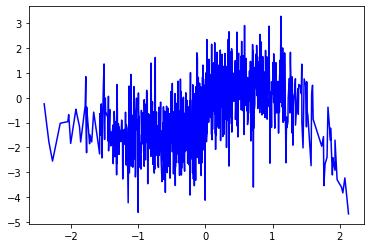

In [10]:
sorted_data = df.sort_values(by="r")
plt.plot(sorted_data["r"], sorted_data["y"], color='blue', label='d = TRUE')

### Brute force: try DiD:

In [11]:
model_ols = smf.ols(formula="y ~ r * d", data=df).fit()

# Display the summary of the model
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     172.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.92e-90
Time:                        17:37:58   Log-Likelihood:                -1483.4
No. Observations:                1000   AIC:                             2975.
Df Residuals:                     996   BIC:                             2994.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2890      0.079    -16.273      

### Try a subset of data around the treatment

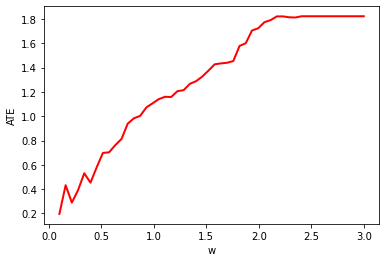

In [12]:
w = np.linspace(0.1, 3, num=50)
ate = np.zeros(50)

for ii in range(50):
    model = smf.ols(formula="y ~ r * d", data=df[np.abs(df['r']) < w[ii]]).fit()
    ate[ii] = model.params['d[T.True]']

plt.plot(w, ate, color='red', linewidth=2)
plt.xlabel('w')
plt.ylabel('ATE')
plt.show()

but the problem is what is the optimal range for neghbours? It can be arbitraty. We may never know the true TE.

### Try local neighbour mean

In [13]:
# a more straight and naive way (but not theoretically supported)
df_subset = df[np.abs(df["r"])<0.2] # consider the subset around 0.1 away from the treatment

In [14]:
df_subset_post = df_subset[df_subset["r"]>0] # the mean after treatment
df_subset_pre = df_subset[df_subset["r"]<0] # the mean after treatment
np.mean(df_subset_post["y"]) - np.mean(df_subset_pre["y"])

0.9318273727378483

Again, the problem is what is the optimal range for neghbours? It can be arbitraty. 

### Try LOESS (LOWESS): nonparametric estimation

In [15]:
# Subset data for d = TRUE and fit LOESS model
subset_data_a = df[df['d']] # the post treatment group (r>0)
fita = lowess(subset_data_a['y'], subset_data_a['r'])

# Subset data for d = FALSE and fit LOESS model
subset_data_b = df[~df['d']] # the pre treatment group (r<0)
fitb = lowess(subset_data_b['y'], subset_data_b['r'])

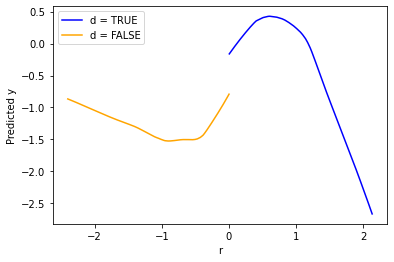

In [16]:
# plot r verse y prediction
plt.plot(fita[:, 0], fita[:, 1], color='blue', label='d = TRUE')
plt.plot(fitb[:, 0], fitb[:, 1], color='orange', label='d = FALSE')
plt.xlabel('r')
plt.ylabel('Predicted y')
plt.legend()
plt.show()

### use the difference b/t the fitted value at 2-0.01, and 2+0.01

In [17]:
preda = fita[:, 1] # the right curve (blue)
predb = fitb[:, 1] # the left curve (yellow)

preda[0] - predb[-1]

0.6300864414068988

Somehow, it does not seem to be a good result.

### The true model is
Left:

$$ y = a_0 + a_1 * r + a_2 * r^2 $$

Right:

$$ y = b_0 + b_1 * r + b_2 * r^2  + b_3 * r^3$$

When $r=0$, the local ATE is $b_0 - a_0$.

### Now let's look at how the data was simulated!

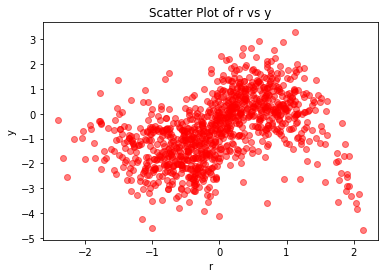

Local ATE: 1


In [18]:
# simulation
# left model y = a0 + a1 * r + a2 * r^2
# right model y = b0 + b1 * r + b2 * r^2 + b3 * r^3
# Given coefficients
a0 = -1
a1 = 1
a2 = 0.5
b0 = 0
b1 = 0.5
b2 = 1
b3 = -1

# Local ATE
local_ate = b0 - a0

# Generate synthetic data
N = 1000
np.random.seed(1523)
r = np.random.normal(size=N) * 0.8
y = np.zeros(N)
ind0 = r <= 0
ind1 = r > 0
y[ind0] = a0 + a1 * r[ind0] + a2 * r[ind0]**2 + np.random.normal(size=np.sum(ind0))
y[ind1] = b0 + b1 * r[ind1] + b2 * r[ind1]**2 + b3 * r[ind1]**3 + np.random.normal(size=np.sum(ind1))

# Create scatter plot
plt.scatter(r, y, color='red', alpha=0.5)
plt.xlabel('r')
plt.ylabel('y')
plt.title('Scatter Plot of r vs y')
plt.show()

print(f"Local ATE: {local_ate}")

In [19]:
tmp = pd.DataFrame({'y': y, 'r': r, 'd': (r>0)})

# Save DataFrame to a CSV file (uncomment below)
# tmp.to_csv('tmp.csv', index=False)

# Task 3: IV

IV is well covered in Basic Econometrics. We are happy to help you in consultation if you need more details. The routines in the lecture note shall serve most purposes.

### Why Exogeneity Assumption Fails?

Suppose
$$
E[\epsilon \mid X] \neq 0
$$
implies
$$
\begin{aligned}
E\left[\hat{\beta}_{O L S} \mid X\right] & =E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} Y \mid X\right] \\
& =E\left[\left(X^{\prime} X\right)^{-1} X^{\prime}(X \beta+\varepsilon) \mid X\right] \\
& =\left(X^{\prime} X\right)^{-1} X^{\prime} X \beta+E\left[\left(X^{\prime} X\right)^{-1} X^{\prime} \varepsilon \mid X\right] \\
& =\beta+\underbrace{\left(X^{\prime} X\right)^{-1} X^{\prime} E[\varepsilon \mid X]}_{\text{bias term}} \\
& \neq \beta
\end{aligned}
$$



1. Omitted variable bias - linear relationship is correct but an important variable is omitted from the regression
2. Reverse causality - the functional form of the regression is incorrect description of the causal mechanism
3. Measurement error - attenuation bias if the error was on x
4. Sample selection

### A brief discussion on IV

One of the typical Endogeneity problems in econometrics is **omitted variable bias**, where the missing variable (included in the error term) is correlated with regressors. The solutions are generally including:
1. Run a Randomised Controlled Trial (RCT)
2. Include the extra variable(s)
3. Instrumental Variables

IV ($z_i$) requires 
1. (exogeneity) $E\left(\epsilon_i \mid z_i\right)=0$
2. (relevance) $E\left(x_i \mid z_i\right)=\pi_0+\pi_1 z_i$ where $\pi_1 \neq 0$